# Transcript from Lecture, October 19, 2021


In [1]:
import sys

########################################
# Change the string in the line below! #
########################################
sys.path.append("/Users/gilbert/Documents/CS111-2021-fall/Python") 

import os
import time
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import linalg as spla
import scipy.sparse
import scipy.sparse.linalg
from scipy import integrate
import networkx as nx
import cs111

##########################################################
# If this import for matplotlib doesn't work, try saying #
#   conda install -c conda-forge ipympl                  #
# at a shell prompt on your computer                     #
##########################################################
import matplotlib
%matplotlib ipympl

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d




np.set_printoptions(precision = 4)

# Jacobi iterative method for Ax = b (matrix view)

In [2]:
A = np.array([[3,-1,1],[-2,4,1],[1,0,-3]])
A

array([[ 3, -1,  1],
       [-2,  4,  1],
       [ 1,  0, -3]])

In [3]:
b = np.array([4,9,-8])
b

array([ 4,  9, -8])

In [4]:
npla.solve(A,b)

array([1., 2., 3.])

In [5]:
cs111.LUsolve(A,b)

(array([1., 2., 3.]), 0.0)

In [6]:
d = A.diagonal()
d

array([ 3,  4, -3])

In [7]:
D = np.diag(d)
D

array([[ 3,  0,  0],
       [ 0,  4,  0],
       [ 0,  0, -3]])

In [8]:
C = A - D
C

array([[ 0, -1,  1],
       [-2,  0,  1],
       [ 1,  0,  0]])

In [9]:
# initial guess x = 0

x = np.zeros(3)
print('x:',x)

relres = npla.norm(A@x-b)/npla.norm(b)
print('relres:',relres)

x: [0. 0. 0.]
relres: 1.0


In [10]:
# try to improve the guess, matrix version
x = (b - C@x) / d
print('x:',x)

relres = npla.norm(A@x-b)/npla.norm(b)
print('relres:',relres)

x: [1.3333 2.25   2.6667]
relres: 0.11009281484864232


In [11]:
# try to improve the guess, matrix version
x = (b - C@x) / d
print('x:',x)

relres = npla.norm(A@x-b)/npla.norm(b)
print('relres:',relres)

x: [1.1944 2.25   3.1111]
relres: 0.06772367705848906


In [12]:
# try to improve the guess, matrix version
x = (b - C@x) / d
print('x:',x)

relres = npla.norm(A@x-b)/npla.norm(b)
print('relres:',relres)

x: [1.0463 2.0694 3.0648]
relres: 0.025228572791021472


In [13]:
x = np.zeros(3)
for i in range(25):
    x = (b - C@x) / d
    relres = npla.norm(A@x-b)/npla.norm(b)
    print('iteration', i, 'x:', x, ', relres:' ,relres)

iteration 0 x: [1.3333 2.25   2.6667] , relres: 0.11009281484864232
iteration 1 x: [1.1944 2.25   3.1111] , relres: 0.06772367705848906
iteration 2 x: [1.0463 2.0694 3.0648] , relres: 0.025228572791021472
iteration 3 x: [1.0015 2.0069 3.0154] , relres: 0.004848508554135736
iteration 4 x: [0.9972 1.9969 3.0005] , relres: 0.0007097510453110915
iteration 5 x: [0.9988 1.9985 2.9991] , relres: 0.00045881447631884156
iteration 6 x: [0.9998 1.9996 2.9996] , relres: 0.00014805175855482053
iteration 7 x: [1.     2.     2.9999] , relres: 1.8326292927075283e-05
iteration 8 x: [1. 2. 3.] , relres: 5.5247721590329305e-06
iteration 9 x: [1. 2. 3.] , relres: 3.3135499185794736e-06
iteration 10 x: [1. 2. 3.] , relres: 6.532135347878024e-07
iteration 11 x: [1. 2. 3.] , relres: 1.0924086459857045e-07
iteration 12 x: [1. 2. 3.] , relres: 5.9011126647527464e-08
iteration 13 x: [1. 2. 3.] , relres: 1.4753632319085098e-08
iteration 14 x: [1. 2. 3.] , relres: 5.375393037573431e-09
iteration 15 x: [1. 2. 3.] 

In [14]:
x, rr = cs111.Jsolve(A,b)

In [15]:
x

array([1., 2., 3.])

In [16]:
rr

[1.0,
 0.11009281484864232,
 0.06772367705848906,
 0.025228572791021472,
 0.004848508554135736,
 0.0007097510453110915,
 0.00045881447631884156,
 0.00014805175855482053,
 1.8326292927075283e-05,
 5.5247721590329305e-06,
 3.3135499185794736e-06,
 6.532135347878024e-07,
 1.0924086459857045e-07,
 5.9011126647527464e-08,
 1.4753632319085098e-08,
 5.375393037573431e-09]

In [ ]:
cs111.Jsolve?

# What can go wrong with Jacobi?

In [17]:
# What could go wrong?
A = np.array([[5,2,3],[4,5,6],[3,4,3]])
print('A:\n',A)

A:
 [[5 2 3]
 [4 5 6]
 [3 4 3]]


In [18]:
b = A @ np.array([1,1,1])
print('b:', b)

b: [10 15 10]


In [19]:
npla.solve(A,b)

array([1., 1., 1.])

In [20]:
d = A.diagonal()
D = np.diag(d)
C = A-D
C

array([[0, 2, 3],
       [4, 0, 6],
       [3, 4, 0]])

In [21]:
d

array([5, 5, 3])

In [22]:
# initial guess x = 0
x = np.zeros(3)
print('x:',x)

relres = npla.norm(A@x-b)/npla.norm(b)
print('relres:',relres)

x: [0. 0. 0.]
relres: 1.0


In [23]:
# try to improve the guess, matrix version
x = (b - C@x) / d     # divide vector elementwise by d
print('x:',x)

relres = npla.norm(A@x-b)/npla.norm(b)
print('relres:',relres)

x: [2.     3.     3.3333]
relres: 1.791483118733158


In [24]:
# try to improve the guess, matrix version
x = (b - C@x) / d
print('x:',x)

relres = npla.norm(A@x-b)/npla.norm(b)
print('relres:',relres)

x: [-1.2    -2.6    -2.6667]
relres: 3.1652822567199093


In [25]:
# try to improve the guess, matrix version
x = (b - C@x) / d
print('x:',x)

relres = npla.norm(A@x-b)/npla.norm(b)
print('relres:',relres)

x: [4.64 7.16 8.  ]
relres: 5.6329103542328385


In [26]:
# try to improve the guess, matrix version
x = (b - C@x) / d
print('x:',x)

relres = npla.norm(A@x-b)/npla.norm(b)
print('relres:',relres)

x: [ -5.664  -10.312  -10.8533]
relres: 9.982717172487776


In [27]:
x, rr = cs111.Jsolve(A,b)

In [28]:
x

array([-1.1051e+249, -1.8668e+249, -2.0248e+249])

In [29]:
len(rr)


1001

# Jacobi on the temperature problem

In [30]:
# Jacobi on the temperature problem
k = 100
A = cs111.make_A(k)
b = cs111.make_b(k, right=cs111.radiator(k))

In [31]:
A.shape

(10000, 10000)

In [32]:
A.nnz

49600

In [33]:
plt.spy(A)

FigureCanvasNbAgg()

In [34]:
t = scipy.sparse.linalg.spsolve(A,b)
t.shape

(10000,)

In [35]:
T = t.reshape(k,k)
X,Y = np.meshgrid(range(k),range(k))
fig = plt.figure()
ax = fig.gca(projection='3d')
ax = fig.gca()
ax.plot_surface(X,Y,T,cmap=cm.hot)

FigureCanvasNbAgg()

In [36]:
t, resvec = cs111.Jsolve(A,b, max_iters=10)
resvec

[1.0,
 0.5542945049874644,
 0.4002642837972196,
 0.3190119823562452,
 0.2679303998944448,
 0.23248621574849976,
 0.20627524658793236,
 0.18600765094325752,
 0.16980907607726523,
 0.15652841397547487,
 0.14541721825234222]

In [37]:
t.shape

(10000,)

In [38]:
T = t.reshape(k,k)
X,Y = np.meshgrid(range(k),range(k))
fig = plt.figure()
ax = fig.gca(projection='3d')
ax = fig.gca()
ax.plot_surface(X,Y,T,cmap=cm.hot)

FigureCanvasNbAgg()

In [42]:
t, resvec = cs111.Jsolve(A,b, max_iters=50000)
resvec[-1]

9.99538423208645e-09

In [44]:
len(resvec)

27595

In [45]:
T = t.reshape(k,k)
X,Y = np.meshgrid(range(k),range(k))
fig = plt.figure()
ax = fig.gca(projection='3d')
ax = fig.gca()
ax.plot_surface(X,Y,T,cmap=cm.hot)

FigureCanvasNbAgg()


Jacobi iters: 10000
last rel res: 4.974732257148453e-05
computed rel res: 4.974732257148453e-05


Text(0.5,1,'Iterative methods for temperature problem with n = 10000')

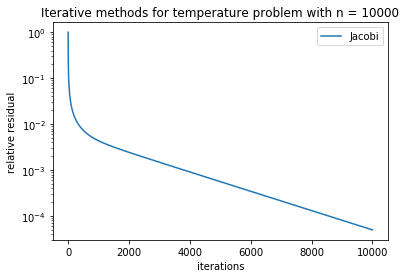

In [46]:
# Plot relative residual norm as a function of iteration for Jacobi
%matplotlib inline
plt.figure()

(xJ,resvecJ) = cs111.Jsolve(A, b, tol = 1e-6, max_iters = 10000)
print('\nJacobi iters:', len(resvecJ)-1)
print('last rel res:', resvecJ[-1])
print('computed rel res:', npla.norm(A@xJ - b) / npla.norm(b))
plt.semilogy(resvecJ, label = 'Jacobi')

plt.legend()
plt.xlabel('iterations')
plt.ylabel('relative residual')
plt.title('Iterative methods for temperature problem with n = %d' % A.shape[0])

# Conjugate gradient iteration (SPD matrices only)

In [47]:
# Conjugate gradient is a more powerful iterative method than Jacobi
t, resvec = cs111.CGsolve(A,b, max_iters=200)
resvec[-1]

9.372731143778617e-06


Jacobi iters: 1000
last rel res: 0.004335982306673086
computed rel res: 0.004335982306673086

CG iters: 270
last rel res: 9.809648149551421e-09
computed rel res: 9.809648149551421e-09


Text(0.5,1,'Iterative methods for temperature problem with n = 10000')

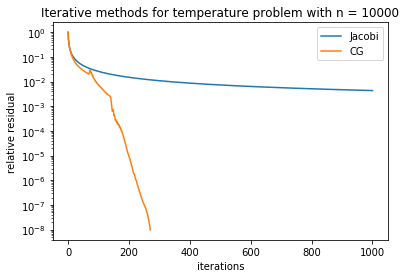

In [48]:
# Plot relative residual (y axis) versus iteration number (x axis) for both Jacobi and CG

%matplotlib inline
plt.figure()

(xJ,resvecJ) = cs111.Jsolve(A, b, tol = 1e-8, max_iters = 1000)
print('\nJacobi iters:', len(resvecJ)-1)
print('last rel res:', resvecJ[-1])
print('computed rel res:', npla.norm(A@xJ - b) / npla.norm(b))
plt.semilogy(resvecJ, label = 'Jacobi')

(xCG,resvecCG) = cs111.CGsolve(A, b, tol = 1e-8, max_iters = 1000)
print('\nCG iters:', len(resvecCG)-1)
print('last rel res:', resvecCG[-1])
print('computed rel res:', npla.norm(A@xCG - b) / npla.norm(b))
plt.semilogy(resvecCG, label = 'CG')

plt.legend()
plt.xlabel('iterations')
plt.ylabel('relative residual')
plt.title('Iterative methods for temperature problem with n = %d' % A.shape[0])

In [49]:
scipy.sparse.linalg.cg?

# CG works if the matrix is symmetric positive definite (SPD)

In [50]:
A = cs111.make_A(2).toarray()
A

array([[ 4., -1., -1.,  0.],
       [-1.,  4.,  0., -1.],
       [-1.,  0.,  4., -1.],
       [ 0., -1., -1.,  4.]])

In [51]:
# Symmetric:
np.all(A == A.T)

True

In [52]:
# Positive definite: LU without partial pivoting works, and all pivots are positive:
L, U = cs111.LUfactorNoPiv(A)
U.diagonal()

array([4.    , 3.75  , 3.7333, 3.4286])

In [53]:
L

array([[ 1.    ,  0.    ,  0.    ,  0.    ],
       [-0.25  ,  1.    ,  0.    ,  0.    ],
       [-0.25  , -0.0667,  1.    ,  0.    ],
       [ 0.    , -0.2667, -0.2857,  1.    ]])

In [54]:
U

array([[ 4.    , -1.    , -1.    ,  0.    ],
       [ 0.    ,  3.75  , -0.25  , -1.    ],
       [ 0.    ,  0.    ,  3.7333, -1.0667],
       [ 0.    ,  0.    ,  0.    ,  3.4286]])

In [55]:
# Positive definite: Eigenvalues are all positive
vals, vecs = npla.eig(A)
vals

array([2., 4., 6., 4.])

In [56]:
# Positive definite: x.T @ A @ x > 0 for every nonzero vector x
x = np.random.randn(4)
x

array([-0.1517,  0.118 ,  0.3026,  1.5363])

In [57]:
x.T @ A @ x

8.789901681016133

In [ ]:
np.random.randn?

<b>Theorem: If A is any matrix, square or not, with full column rank (i.e. all the columns are linearly independent), then A.T @ A is SPD.

In [58]:
A = np.random.random((8,4))
A

array([[0.4899, 0.1567, 0.1451, 0.375 ],
       [0.5577, 0.032 , 0.3526, 0.969 ],
       [0.3773, 0.6279, 0.9896, 0.336 ],
       [0.9739, 0.4887, 0.9708, 0.8049],
       [0.6801, 0.0923, 0.2462, 0.2301],
       [0.0484, 0.3831, 0.832 , 0.228 ],
       [0.9259, 0.082 , 0.0089, 0.0529],
       [0.537 , 0.7642, 0.9371, 0.9801]])

In [59]:
npla.matrix_rank(A)

4

In [60]:
B = A.T @ A
B

array([[3.2524, 1.3751, 2.3056, 2.3776],
       [1.3751, 1.4047, 2.1881, 1.5561],
       [2.3056, 2.1881, 3.6981, 2.6752],
       [2.3776, 1.5561, 2.6752, 2.9086]])

In [61]:
vals, vecs = npla.eig(B)
vals

array([9.3328, 1.3222, 0.5314, 0.0773])

In [62]:
L, U = cs111.LUfactorNoPiv(B)
U.diagonal()

array([3.2524, 0.8232, 0.2755, 0.6871])

<b> Every entry of A.T @ A is the dot product of two columns of A

In [63]:
A[:, 2].dot(A[:,0])

2.305645961159575

In [64]:
B[2,0]

2.305645961159575